In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(44)
import time

In [2]:
# Define problem sizes you want to evaluate
problem_sizes = [10, 20, 30, 40, 50]

# Initialize arrays to store performance metrics
time_taken = {alg: [] for alg in ['RHC', 'SA', 'GA', 'MIMIC']}
best_fitness = {alg: [] for alg in ['RHC', 'SA', 'GA', 'MIMIC']}
function_evaluations = {alg: [] for alg in ['RHC', 'SA', 'GA', 'MIMIC']}
evaluations_per_second = {alg: [] for alg in ['RHC', 'SA', 'GA', 'MIMIC']}
fitness_vs_iterations = {alg: [] for alg in ['RHC', 'SA', 'GA', 'MIMIC']}

In [3]:

def update_performance_metrics(algorithm, best_fitness_val, curve, start_time, end_time):
    time_taken[algorithm].append(end_time - start_time)
    best_fitness[algorithm].append(best_fitness_val)
    function_evaluations[algorithm].append(len(curve))
    evaluations_per_second[algorithm].append(len(curve) / (end_time - start_time))
    fitness_vs_iterations[algorithm].append(curve)

In [4]:

    
for size in problem_sizes:
    # Define the fitness function and problem
    fitness = mlrose_hiive.FlipFlop()
    problem = mlrose_hiive.DiscreteOpt(length=size, fitness_fn=fitness, maximize=True, max_val=2)

    # Random Hill Climb
    start_time = time.time()
    _, best_fitness_val, curve = mlrose_hiive.random_hill_climb(problem, curve=True, max_attempts=10, max_iters=np.inf, restarts=0)
    end_time = time.time()
    update_performance_metrics('RHC', best_fitness_val, curve, start_time, end_time)

    # Simulated Annealing
    start_time = time.time()
    _, best_fitness_val, curve = mlrose_hiive.simulated_annealing(problem, curve=True, max_attempts=10, max_iters=np.inf)
    end_time = time.time()
    update_performance_metrics('SA', best_fitness_val, curve, start_time, end_time)

    # Genetic Algorithm
    start_time = time.time()
    _, best_fitness_val, curve = mlrose_hiive.genetic_alg(problem, curve=True, max_attempts=10, max_iters=np.inf)
    end_time = time.time()
    update_performance_metrics('GA', best_fitness_val, curve, start_time, end_time)

    # MIMIC
    start_time = time.time()
    _, best_fitness_val, curve = mlrose_hiive.mimic(problem, curve=True, max_attempts=10, max_iters=np.inf)
    end_time = time.time()
    update_performance_metrics('MIMIC', best_fitness_val, curve, start_time, end_time)

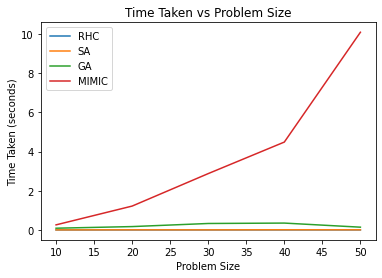

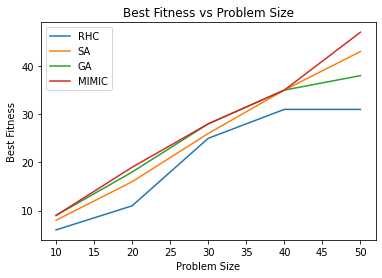

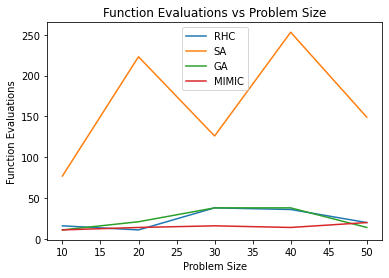

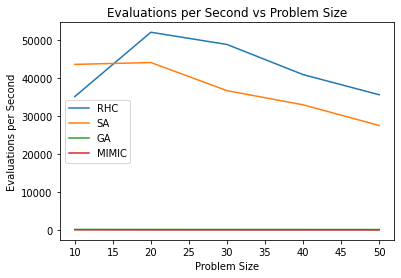

In [17]:
# Plotting results
def plot_results(metric_dict, title, ylabel, xlabel='Problem Size'):
    for alg, values in metric_dict.items():
        plt.plot(problem_sizes, values, label=alg)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()
    
plot_results(time_taken, 'Time Taken vs Problem Size', 'Time Taken (seconds)')
plot_results(best_fitness, 'Best Fitness vs Problem Size', 'Best Fitness')
plot_results(function_evaluations, 'Function Evaluations vs Problem Size', 'Function Evaluations')
plot_results(evaluations_per_second, 'Evaluations per Second vs Problem Size', 'Evaluations per Second')


In [23]:
def plot_overlayed_graph_for_size_30(fitness_vs_iterations):
    plt.figure(figsize=(12, 7))
    # We will use the second entry (index 1), assuming it corresponds to the problem size 30.
    for algo in fitness_vs_iterations:
        # Extract the fitness values and iteration numbers
        curve = fitness_vs_iterations[algo][1]  # Assuming index 1 is for problem size 30
        fitness_values = curve[:, 0]
        iterations = curve[:, 1]
        plt.plot(iterations, fitness_values, label=f"{algo}")

    plt.title('Iteration vs Fitness for Problem Size 30')
    plt.xlabel('Iteration')
    plt.ylabel('Fitness Value')
    plt.legend()
    plt.show()

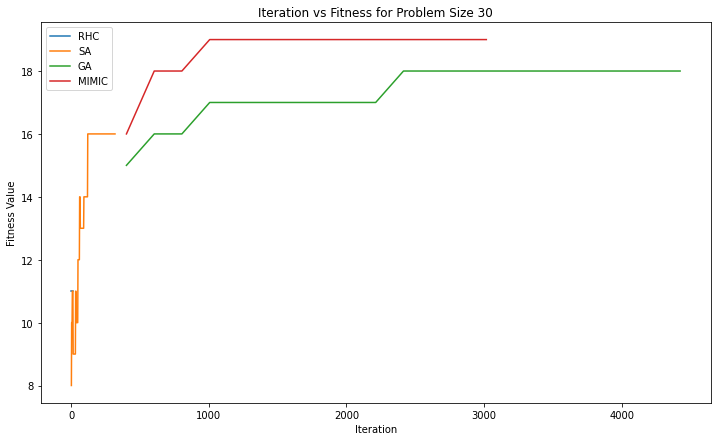

In [24]:
plot_overlayed_graph_for_size_30(fitness_vs_iterations)
